## Background (Playground)

http://www.alastairsanderson.com/R/tutorials/robust-regression-in-R/

In [4]:
set.seed(123)                       # allow reproducible random numbers
mydata <- within(data.frame(x=1:10), y <- rnorm(x, mean=x))
fm.orig <- lm(y ~ x, data=mydata)   # fitted model for original data

In [5]:
mydata$y[2] <- 20
fm.lm <- update(fm.orig)

In [6]:
coef(summary(fm.orig))


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5254674,0.6672766,0.7874806,4.536973e-01
x,0.9180288,0.1075414,8.5365180,2.728816e-05


In [7]:
coef(summary(fm.lm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.6021932,3.708910,1.7800898,0.1129350
x,0.1446273,0.597745,0.2419549,0.8149021


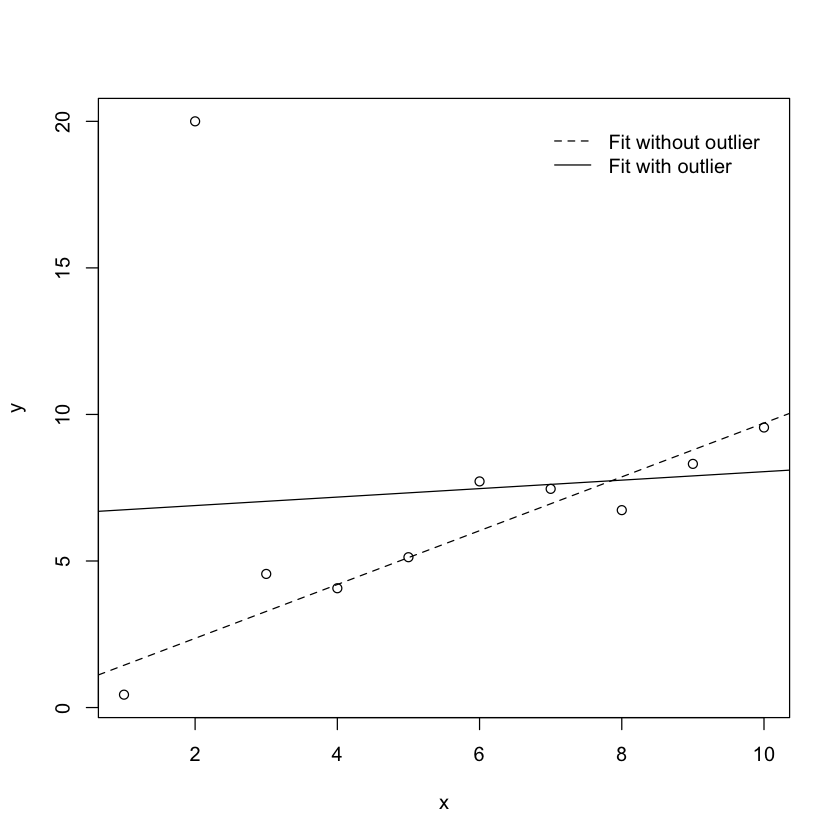

In [8]:
plot(y ~ x, data=mydata)
abline(fm.orig, lty="dashed")    # use a dashed line
abline(fm.lm)
legend("topright", inset=0.03, bty="n",
       legend = c("Fit without outlier", "Fit with outlier"),
       lty = c("dashed", "solid")
       )

In [11]:
library("MASS")                   # load required package (part of standard R installation)
fm.rlm <- rlm(y ~ x, data=mydata)

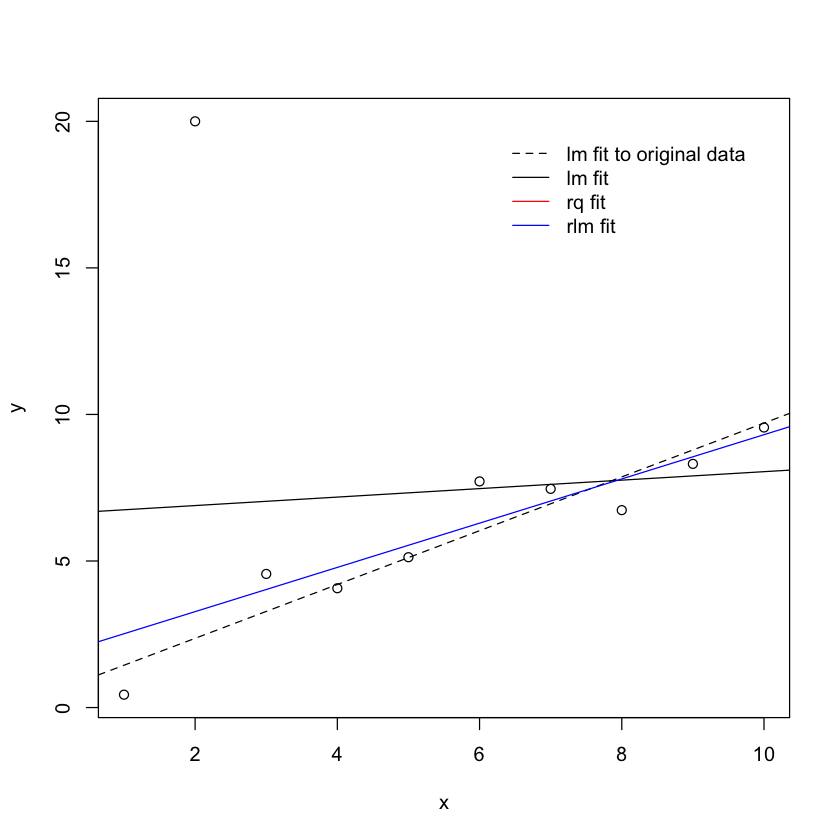

In [13]:
plot(y ~ x, data=mydata)
abline(fm.orig, lty="dashed")    # use a dashed line
abline(fm.lm)
# abline(fm.rq, col="red")
abline(fm.rlm, col="blue")
legend("topright", inset=0.05, bty="n",
       legend = c("lm fit to original data", "lm fit", "rq fit", "rlm fit"),
       lty = c(2, 1, 1, 1),      # 1 = "solid" ; 2 = "dashed"
       col = c("black", "black", "red", "blue")
       )

In [14]:
set.seed(123)          # allow reproducible random numbers
orig <- within(data.frame(x=1:10),
               {
                 type <- "orig"
                 y <- rnorm(x, mean=x)
               }
               )
outlier <- orig
outlier$y[2] <- 20
outlier$type <- "outlier"

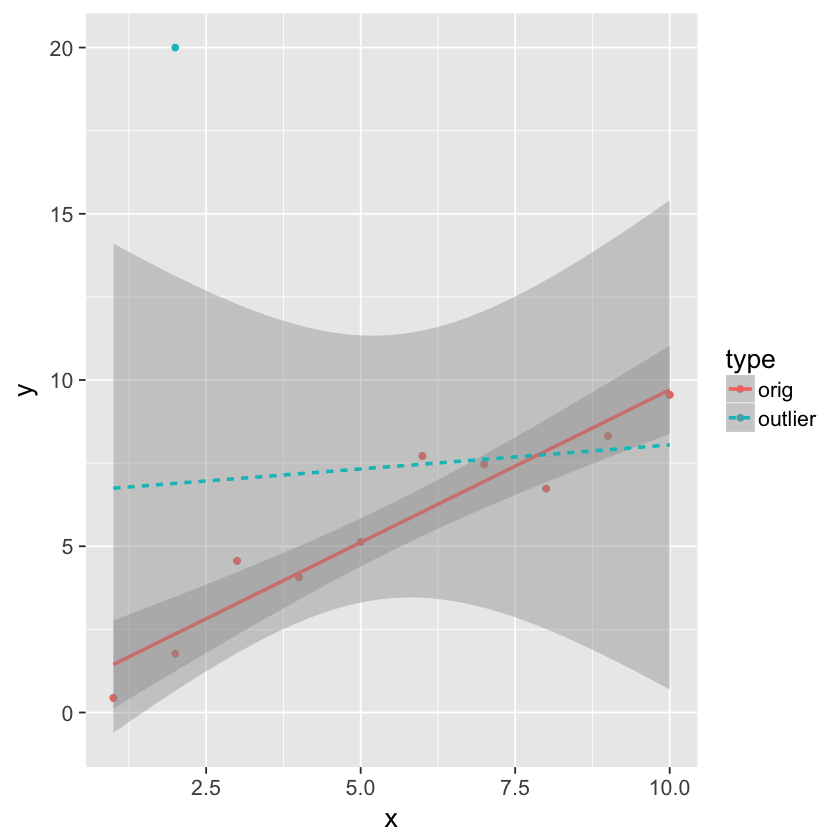

In [15]:
library("ggplot2")
theme_set(theme_grey(base_size = 16))  # increase default font etc. size
p <- ggplot(data = rbind(outlier, orig), aes(x, y, colour=type, linetype=type)) +
  geom_point()                         # "base" plot, with points only
p + geom_smooth(method = "lm")         # fit & plot lm model + envelope

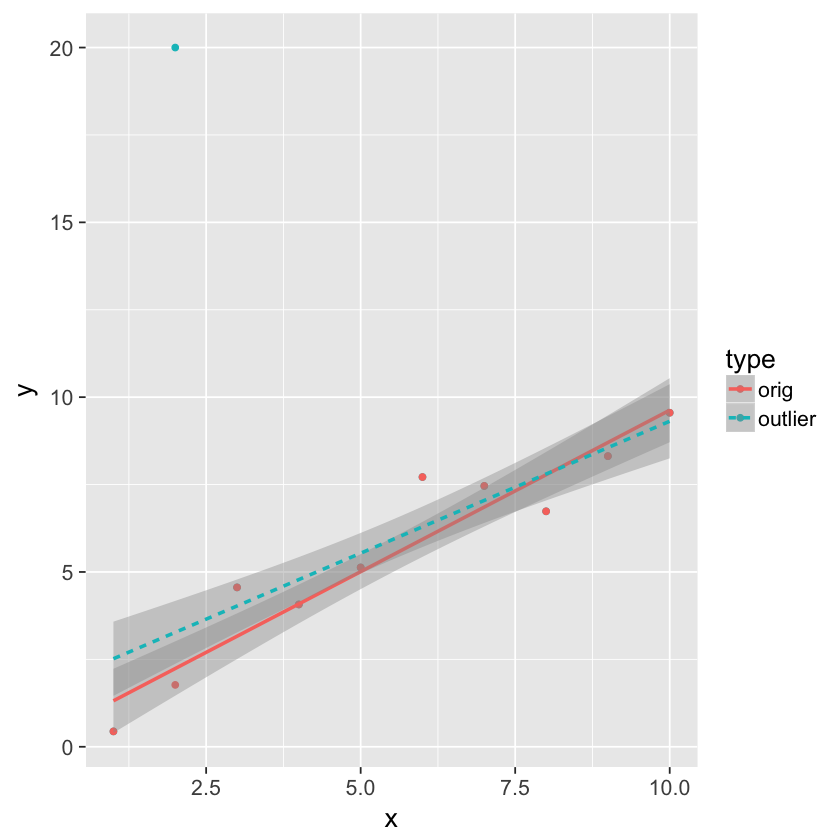

In [16]:
library("MASS")                # part of standard R installation
p + geom_smooth(method="rlm")  # fit & plot *robust* model + envelope

Warning message:
“package ‘quantreg’ was built under R version 3.4.4”Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve



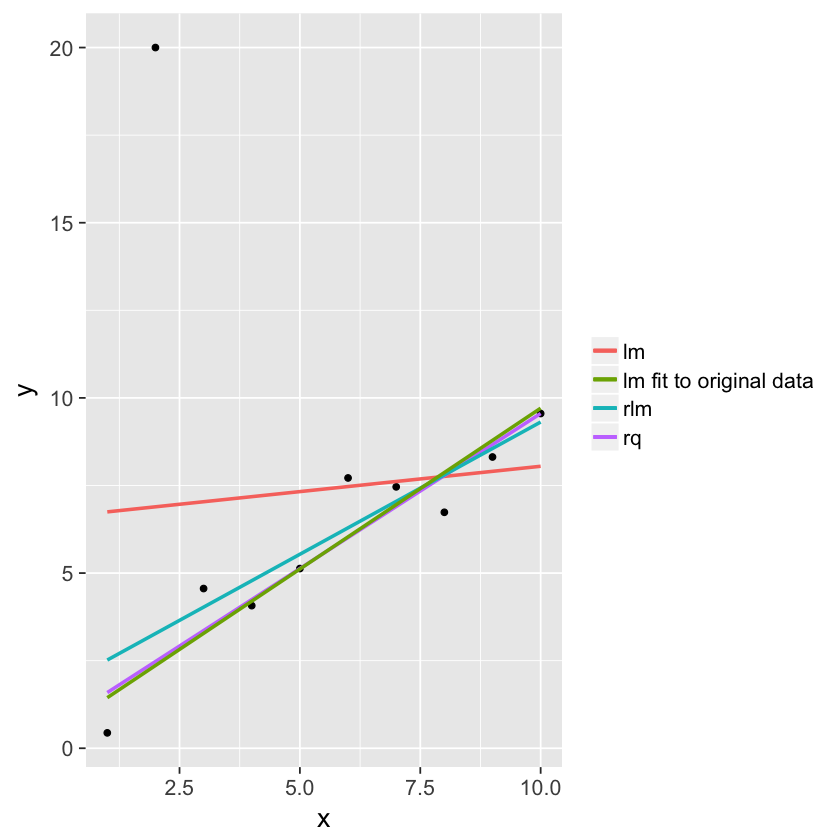

In [17]:
library("quantreg")   # may need 'install.packages("quantreg")' if package not installed
ggplot(data=outlier, aes(x, y)) +                                  # use "outlier" data frame
  geom_point() +                                                   # } these all 
  geom_smooth(method="lm", aes(colour="lm"), se=FALSE) +           # }  automatically
  geom_smooth(method="rq", aes(colour="rq"), se=FALSE) +           # }  inherit 
  geom_smooth(method="rlm", aes(colour="rlm"), se=FALSE) +         # }  "data=outlier"
  geom_smooth(method="lm", data=orig, aes(colour="lm fit to original data"),
              se=FALSE) +     # use "orig" data frame
  labs(colour=NULL)           # remove legend title

## The mapply Method

In [19]:
fm.rlm <- rlm(y ~ x, data=mydata, )

In [23]:
coef(summary(fm.rlm))

,Value,Std. Error,t value
(Intercept),1.7631738,0.9990055,1.764929
x,0.7547735,0.1610043,4.687908


In [24]:
mydata

x,y
1,0.4395244
2,20.0000000
3,4.5587083
4,4.0705084
5,5.1292877
6,7.7150650
7,7.4609162
8,6.7349388
9,8.3131471
10,9.5543380


In [33]:
df = data.frame(x1=mydata$x, x2=mydata$x*2, x3=mydata$x*3, y=mydata$y)

In [34]:
df

x1,x2,x3,y
1,2,3,0.4395244
2,4,6,20.0000000
3,6,9,4.5587083
4,8,12,4.0705084
5,10,15,5.1292877
6,12,18,7.7150650
7,14,21,7.4609162
8,16,24,6.7349388
9,18,27,8.3131471
10,20,30,9.5543380


In [35]:
mymodel.rlm <-rlm(y~x1, data=df)

In [37]:
coef(summary(fm.rlm))

,Value,Std. Error,t value
(Intercept),1.7631738,0.9990055,1.764929
x,0.7547735,0.1610043,4.687908


## P-value ?

https://stats.stackexchange.com/questions/146421/p-values-of-coefficients-in-rlm-robust-regression

https://stats.stackexchange.com/questions/205614/p-values-and-significance-in-rlm-mass-package-r

In [39]:
library(MASS)
library(sfsmisc)
summary(rsl <- rlm(stack.loss ~ ., stackloss))

Warning message:
“package ‘sfsmisc’ was built under R version 3.4.4”


Call: rlm(formula = stack.loss ~ ., data = stackloss)
Residuals:
     Min       1Q   Median       3Q      Max 
-8.91753 -1.73127  0.06187  1.54306  6.50163 

Coefficients:
            Value    Std. Error t value 
(Intercept) -41.0265   9.8073    -4.1832
Air.Flow      0.8294   0.1112     7.4597
Water.Temp    0.9261   0.3034     3.0524
Acid.Conc.   -0.1278   0.1289    -0.9922

Residual standard error: 2.441 on 17 degrees of freedom

In [40]:
f.robftest(rsl, var = "Air.Flow")



	robust F-test (as if non-random weights)

data:  from rlm(formula = stack.loss ~ ., data = stackloss)
F = 50.879, p-value = 1.677e-06
alternative hypothesis: true Air.Flow is not equal to 0


In [41]:
f.robftest(rsl, var = "Acid.Conc.")



	robust F-test (as if non-random weights)

data:  from rlm(formula = stack.loss ~ ., data = stackloss)
F = 1.0447, p-value = 0.3211
alternative hypothesis: true Acid.Conc. is not equal to 0


### Back to mydata

In [42]:
f.robftest(mymodel.rlm, var="x1")


	robust F-test (as if non-random weights)

data:  from rlm(formula = y ~ x1, data = df)
F = 18.722, p-value = 0.002522
alternative hypothesis: true x1 is not equal to 0


In [48]:
f.robftest(mymodel.rlm, var="x1")


	robust F-test (as if non-random weights)

data:  from rlm(formula = y ~ x1, data = df)
F = 18.722, p-value = 0.002522
alternative hypothesis: true x1 is not equal to 0


In [51]:
f.robftest(mymodel.rlm, var="x1")


	robust F-test (as if non-random weights)

data:  from rlm(formula = y ~ x1, data = df)
F = 18.722, p-value = 0.002522
alternative hypothesis: true x1 is not equal to 0


In [54]:
test = f.robftest(mymodel.rlm, var="x1")

In [55]:
test$p.value

[1] 0.002522377

In [109]:
library(MASS)
library(sfsmisc)

calc.p.value <- function(col, input_data=df, intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'y', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input_data)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
}

In [112]:
calc.p.value('x1', input_data = df)

[1] 0.002522377

In [111]:
calc.p.value('x2', input_data = df)

[1] 0.002522377

In [141]:
variables.list <- colnames(df)[colnames(df) != 'y']
p.rule.list <- lapply(variables.list, calc.p.value)
setNames(data.frame(p.rule.list), c(variables.list))

x1,x2,x3
0.002522377,0.002522377,0.002522377


In [140]:
colnames(df)[colnames(df) != 'y']

[1] "x1" "x2" "x3"

## Final Function

In [170]:
get.pvalue.dataframe <- function(input.df){
    
    calc.p.value <- function(col,  intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'y', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input.df)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
    }
    
    variables.list <- colnames(input.df)[colnames(input.df) != 'y']
    p.rule.list <- lapply(variables.list, calc.p.value)
    setNames(data.frame(p.rule.list), c(variables.list))
}

In [171]:
get.pvalue.dataframe(df)

x1,x2,x3
0.002522377,0.002522377,0.002522377


## Test on Iris dataset

In [145]:
# iris flowers datasets
data(iris)
dim(iris)
levels(iris$Species)
head(iris)

[1] 150   5

[1] "setosa"     "versicolor" "virginica"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [153]:
iris.df <- iris[, c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width')]

In [157]:
head(iris.df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [160]:
library(plyr)
iris.df <- rename(iris.df, c("Sepal.Length"='y'))

In [163]:
head(iris.df)

y,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [172]:
get.pvalue.dataframe(iris.df)

Sepal.Width,Petal.Length,Petal.Width
0.08556764,2.223231e-44,4.090951e-35
